# Logistic Regression

目標
* 將資料分為training data和testing data
* 建置Logistic Model
* 使用混淆矩陣
* 畫出Decision Boundary

### 載入套件

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

### 修改當下檔案開啟目錄

In [2]:
os.chdir("/Users/liouscott/Documents/scott/machine learning/Machine Learning A-Z Template Folder/Part 3 - Classification/Section 14 - Logistic Regression/Logistic_Regression")

### 載入資料

In [3]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values
print (dataset.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


### 切割train data和test data

In [4]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

/Users/liouscott/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### 將資料做標準化

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/Users/liouscott/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


### 建置Logistic Model

In [6]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### 將test data放入估計完成的Logistic Model

In [7]:
y_pred = classifier.predict(X_test)

### 使用混淆矩陣檢視預測力

In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print (cm)

[[65  3]
 [ 8 24]]


### 開始繪製Decision Boundary

### 此次匯入的 ListedColormap 套件，是給定分群的顏色。

In [9]:
from matplotlib.colors import ListedColormap

In [10]:
X_set, y_set = X_train, y_train

#### 1.首先界Age變數的範圍，使用函數為np.arange。
   * start : 起始值
   * stop : 終止值
   * step : 每一步增加的範圍

In [11]:
X_set[:, 0].min() - 1

-2.9931891594584856

In [12]:
X_set[:, 0].max() + 1

3.1661654959202692

In [13]:
a = np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01)
print (a)

[-2.99318916 -2.98318916 -2.97318916 -2.96318916 -2.95318916 -2.94318916
 -2.93318916 -2.92318916 -2.91318916 -2.90318916 -2.89318916 -2.88318916
 -2.87318916 -2.86318916 -2.85318916 -2.84318916 -2.83318916 -2.82318916
 -2.81318916 -2.80318916 -2.79318916 -2.78318916 -2.77318916 -2.76318916
 -2.75318916 -2.74318916 -2.73318916 -2.72318916 -2.71318916 -2.70318916
 -2.69318916 -2.68318916 -2.67318916 -2.66318916 -2.65318916 -2.64318916
 -2.63318916 -2.62318916 -2.61318916 -2.60318916 -2.59318916 -2.58318916
 -2.57318916 -2.56318916 -2.55318916 -2.54318916 -2.53318916 -2.52318916
 -2.51318916 -2.50318916 -2.49318916 -2.48318916 -2.47318916 -2.46318916
 -2.45318916 -2.44318916 -2.43318916 -2.42318916 -2.41318916 -2.40318916
 -2.39318916 -2.38318916 -2.37318916 -2.36318916 -2.35318916 -2.34318916
 -2.33318916 -2.32318916 -2.31318916 -2.30318916 -2.29318916 -2.28318916
 -2.27318916 -2.26318916 -2.25318916 -2.24318916 -2.23318916 -2.22318916
 -2.21318916 -2.20318916 -2.19318916 -2.18318916 -2

#### 2.EstimatedSalary變數的範圍

In [14]:
b = np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01)

In [15]:
a.shape

(616,)

In [16]:
b.shape

(592,)

#### 3.使用函數np.meshgrid定義
說明：http://blog.sina.com.cn/s/blog_4c8ff8950100chmc.html

In [17]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(a,b)

In [19]:
X1.shape

(592, 616)

In [20]:
X1

array([[-2.99318916, -2.98318916, -2.97318916, ...,  3.13681084,
         3.14681084,  3.15681084],
       [-2.99318916, -2.98318916, -2.97318916, ...,  3.13681084,
         3.14681084,  3.15681084],
       [-2.99318916, -2.98318916, -2.97318916, ...,  3.13681084,
         3.14681084,  3.15681084],
       ..., 
       [-2.99318916, -2.98318916, -2.97318916, ...,  3.13681084,
         3.14681084,  3.15681084],
       [-2.99318916, -2.98318916, -2.97318916, ...,  3.13681084,
         3.14681084,  3.15681084],
       [-2.99318916, -2.98318916, -2.97318916, ...,  3.13681084,
         3.14681084,  3.15681084]])

In [21]:
X2.shape

(592, 616)

In [22]:
X2

array([[-2.58254245, -2.58254245, -2.58254245, ..., -2.58254245,
        -2.58254245, -2.58254245],
       [-2.57254245, -2.57254245, -2.57254245, ..., -2.57254245,
        -2.57254245, -2.57254245],
       [-2.56254245, -2.56254245, -2.56254245, ..., -2.56254245,
        -2.56254245, -2.56254245],
       ..., 
       [ 3.30745755,  3.30745755,  3.30745755, ...,  3.30745755,
         3.30745755,  3.30745755],
       [ 3.31745755,  3.31745755,  3.31745755, ...,  3.31745755,
         3.31745755,  3.31745755],
       [ 3.32745755,  3.32745755,  3.32745755, ...,  3.32745755,
         3.32745755,  3.32745755]])

#### 4.使用函數ravel矩陣攤平
說明：http://blog.csdn.net/lanchunhui/article/details/50354978

In [23]:
X2.ravel().shape

(364672,)

In [24]:
np.array([X1.ravel(), X2.ravel()]).shape

(2, 364672)

#### 5.使用predict結果

In [18]:
classifier.predict(np.array([X1.ravel(), X2.ravel()]).T)

array([0, 0, 0, ..., 1, 1, 1])

In [69]:
classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).shape

(364672,)

In [70]:
classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ..., 
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

In [25]:
classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape).shape

(592, 616)

#### 6.使用函數plt.contourf說明
說明：https://morvanzhou.github.io/tutorials/data-manipulation/plt/3-3-contours/

In [19]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

#### 7.使用函數plt.contourf說明
說明：畫出X軸與Y軸界線

In [20]:
plt.xlim(X1.min(), X1.max())

(-2.9931891594584856, 3.1568108405413833)

In [21]:
plt.ylim(X2.min(), X2.max())

(-2.5825424477554764, 3.3274575522443977)

#### 8.畫出散佈圖plt.scatter

In [32]:
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    print (i,j)

0 0
1 1


將上列程式步驟拆解

In [30]:
np.unique(y_set)

array([0, 1])

In [31]:
X_set[y_set == 0, 0].shape

(189,)

In [31]:
y_set == 0

array([ True, False,  True, False, False, False,  True,  True,  True,
        True,  True,  True, False, False, False,  True, False,  True,
        True, False,  True, False,  True, False,  True,  True, False,
       False, False, False,  True, False,  True, False,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
       False, False, False, False,  True,  True,  True, False,  True,
       False,  True, False,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True, False,
        True, False, False, False,  True,  True, False, False,  True,
        True, False, False,  True, False,  True,  True, False, False,
        True, False, False, False,  True,  True,  True,  True,  True,
       False,  True,  True, False, False, False, False, False,  True,
       False, False,  True, False,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True, False,  True,  True,
       False,  True,

In [32]:
X_set[y_set == 0, 0]

array([ 0.58164944, -0.01254409,  0.08648817, -0.01254409, -0.21060859,
       -0.21060859, -0.30964085, -0.30964085,  1.07681071, -0.70576986,
        0.77971394, -1.20093113, -0.01254409,  0.38358493, -0.30964085,
       -1.20093113, -1.39899564,  0.77971394, -1.00286662, -1.00286662,
        0.28455268, -0.50770535, -1.79512465, -0.70576986,  0.38358493,
       -0.30964085, -0.30964085, -0.01254409, -0.21060859, -0.01254409,
       -1.79512465,  0.38358493, -1.20093113, -0.30964085, -1.6960924 ,
       -1.00286662, -0.11157634, -1.10189888,  0.08648817, -1.29996338,
       -0.30964085, -0.30964085, -1.20093113, -1.29996338, -0.30964085,
       -0.50770535,  0.28455268, -0.70576986, -0.70576986, -1.99318916,
       -1.20093113,  0.18552042,  0.77971394,  2.06713324,  0.77971394,
       -1.00286662,  0.18552042, -0.30964085, -1.49802789,  0.38358493,
       -1.00286662, -0.01254409, -1.20093113, -0.90383437, -0.11157634,
       -1.59706014, -0.01254409, -1.10189888,  0.97777845, -1.20

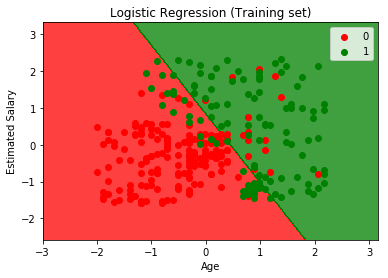

In [33]:
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [19]:
from matplotlib.colors import ListedColormap

In [20]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

In [21]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

In [22]:
plt.xlim(X1.min(), X1.max())

(-2.9931891594584856, 3.1568108405413833)

In [23]:
plt.ylim(X2.min(), X2.max())

(-2.5825424477554764, 3.3274575522443977)

In [34]:
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

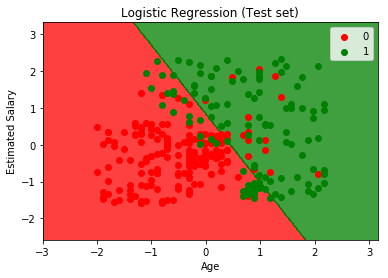

In [35]:
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()